# Statistical tasks

## 1. Load CSV files

In [101]:
import pandas as pd

student_mat_df = pd.read_csv('student-mat.csv', sep=';')
student_por_df = pd.read_csv('student-por.csv', sep=';', quoting=3)

# Clean the extra quotes from student_por_df
for col in student_por_df.columns:
    if student_por_df[col].dtype == 'object':
        student_por_df[col] = student_por_df[col].str.replace('""', '', regex=False)

# Convert G1, G2, G3 to numeric in student_por_df
student_por_df['G1'] = pd.to_numeric(student_por_df['G1'], errors='coerce')
student_por_df['G2'] = pd.to_numeric(student_por_df['G2'], errors='coerce')
student_por_df['G3'] = pd.to_numeric(student_por_df['G3'], errors='coerce')

In [102]:
print('Student Mat Dataset has: ', student_mat_df.shape[0], 'rows and', student_mat_df.shape[1], 'columns')
print('Student Por Dataset has: ', student_por_df.shape[0], 'rows and', student_por_df.shape[1], 'columns')

Student Mat Dataset has:  395 rows and 33 columns
Student Por Dataset has:  650 rows and 33 columns


In [103]:
por_numeric = student_por_df.select_dtypes(include='number').columns.tolist()
por_categorical = student_por_df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Student Por numeric and categorical features: \n')
print(f"Numeric Features ({len(por_numeric)}):")
print(por_numeric)
print(f"\nCategorical Features ({len(por_categorical)}):")
print(por_categorical)

Student Por numeric and categorical features: 

Numeric Features (16):
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Categorical Features (17):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [104]:
mat_numeric = student_mat_df.select_dtypes(include='number').columns.tolist()
mat_categorical = student_mat_df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Student Mat numeric and categorical features: \n')
print(f"Numeric Features ({len(mat_numeric)}):")
print(mat_numeric)
print(f"\nCategorical Features ({len(mat_categorical)}):")
print(mat_categorical)

Student Mat numeric and categorical features: 

Numeric Features (16):
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Categorical Features (17):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


### **Result Explanation**
### 1. Reading the CSV files
The original CSV files were not formatted well, so I applied some adjustments to load both files properly into DataFrames.

### 2. Retrieving rows and columns
I used the .shape attribute to find the number of rows and columns in each DataFrame.
**shape[0]** gives the number of rows
**shape[1]** gives the number of columns

### 3. Listing categorical and numeric features
I used **select_dtypes()** to separate the categorical and numeric columns in the dataset. Both mat and por CSV files have same features.

## 2. G1, G2 and G3 visualization

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def analyze_dataset(df, title):
    print(f"\n {title}")
    
    # Make a copy
    data = df.copy()
    
    # Encode categorical columns
    label_encoder = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = label_encoder.fit_transform(data[col])
    
    # Compute correlation matrix
    corr = data.corr()
    
    # Heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, 
                linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title(f"Correlation Heatmap - {title}", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Show top correlated features for grades (excluding other grade columns)
    grade_cols = ['G1', 'G2', 'G3']
    print(f"\n TOP 3 PREDICTIVE FEATURES FOR EACH GRADE \n")
    
    for target in grade_cols:
        # Exclude other grade columns from correlation
        other_grades = [g for g in grade_cols if g != target]
        target_corr = corr[target].drop(grade_cols).abs().sort_values(ascending=False)
        
        print(f"\n{target} - Top 3 Most Influential Features:")
        for i, (feature, corr_value) in enumerate(target_corr.head(3).items(), 1):
            print(f"  {i}. {feature:15s} : {corr_value:.4f}")
    
    return corr



 Student Math Dataset


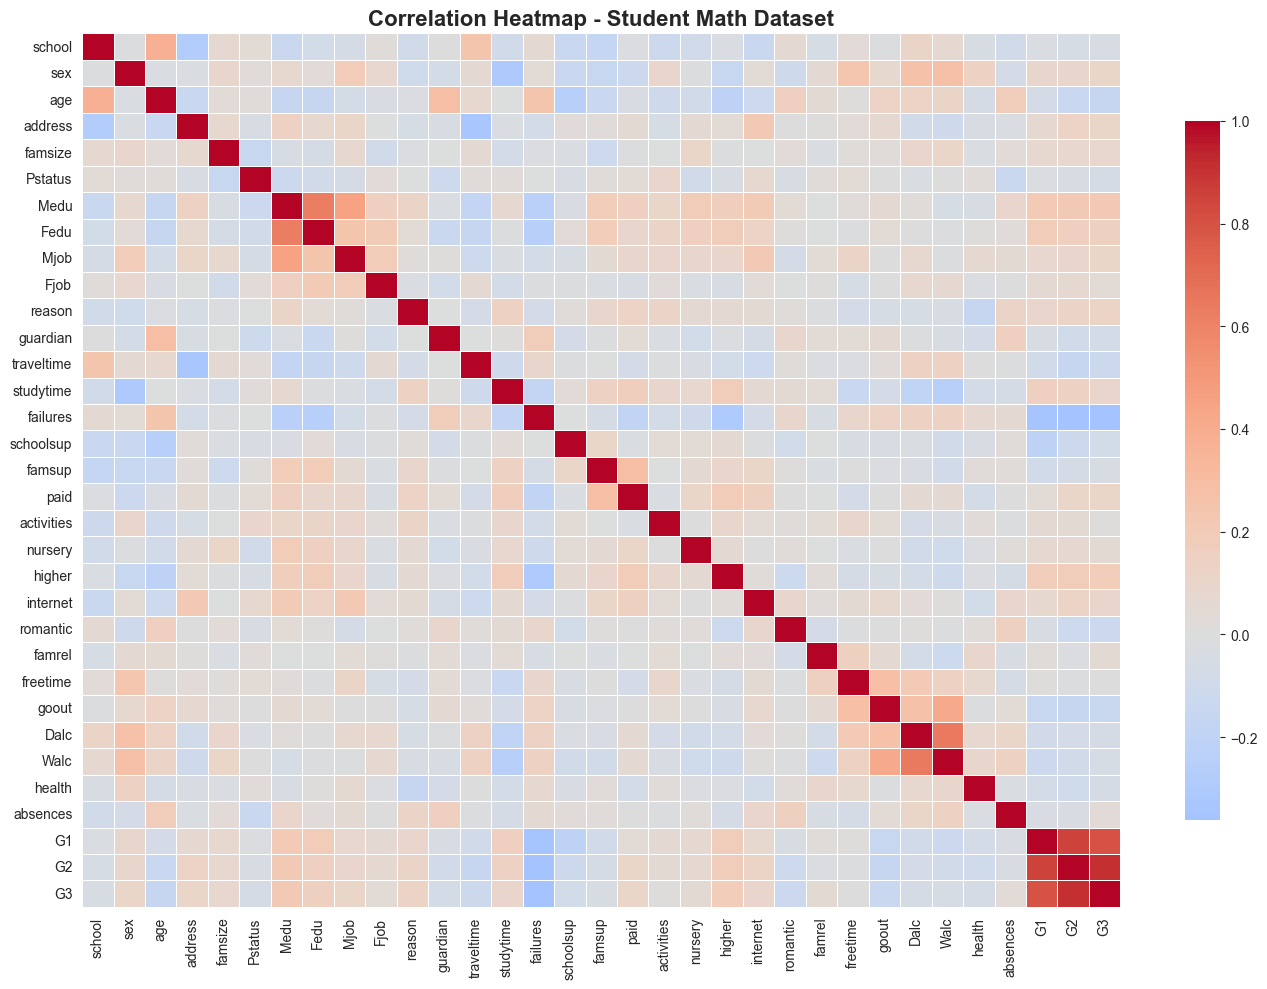


 TOP 3 PREDICTIVE FEATURES FOR EACH GRADE 


G1 - Top 3 Most Influential Features:
  1. failures        : 0.3547
  2. schoolsup       : 0.2126
  3. Medu            : 0.2053

G2 - Top 3 Most Influential Features:
  1. failures        : 0.3559
  2. Medu            : 0.2155
  3. higher          : 0.1791

G3 - Top 3 Most Influential Features:
  1. failures        : 0.3604
  2. Medu            : 0.2171
  3. higher          : 0.1825

 Student Portuguese Dataset


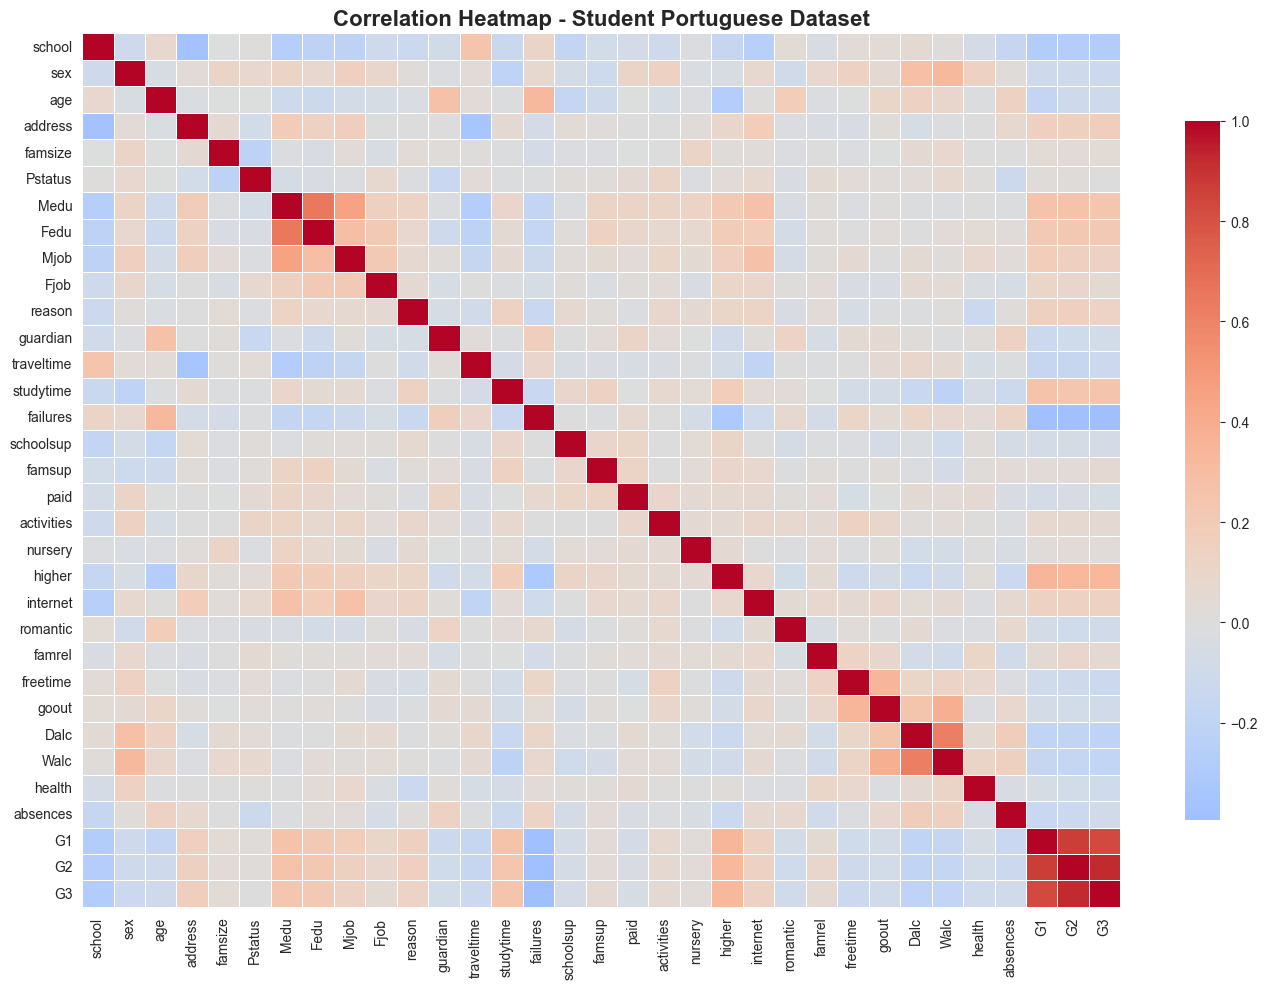


 TOP 3 PREDICTIVE FEATURES FOR EACH GRADE 


G1 - Top 3 Most Influential Features:
  1. failures        : 0.3842
  2. higher          : 0.3490
  3. school          : 0.2776

G2 - Top 3 Most Influential Features:
  1. failures        : 0.3858
  2. higher          : 0.3320
  3. school          : 0.2676

G3 - Top 3 Most Influential Features:
  1. failures        : 0.3933
  2. higher          : 0.3322
  3. school          : 0.2818


In [106]:
# Run analysis on both datasets
corr_mat = analyze_dataset(student_mat_df, "Student Math Dataset")
corr_por = analyze_dataset(student_por_df, "Student Portuguese Dataset")

### **Analysis of Key Features Influencing Student Grades**

In this analysis, we examined two student performance datasets: **Math** students (`student-mat.csv`) and **Portuguese** students (`student-por.csv`). Our goal was to determine which attributes have the strongest influence on the students’ grades `G1`, `G2`, and `G3`.

### Methodology

1. **Preprocessing**
   Many attributes in the dataset, such as *school*, *address*, and *guardian*, are categorical. Since correlation calculations require numeric values, all categorical features were converted into numerical form using `LabelEncoder`.

2. **Correlation Matrix**
   A correlation matrix was computed for each dataset, showing the strength and direction of relationships between all numeric variables. Positive values indicate that as one variable increases, the other tends to increase as well, while negative values indicate the opposite trend.

3. **Heatmap Visualization**
   A heatmap was generated using Seaborn to provide a visual representation of the correlation structure. Darker shades and stronger colors represent stronger correlations.

4. **Identifying Influential Features**
   For each dataset, we calculated the **three most strongly correlated features for each grade column (`G1`, `G2`, and `G3`)**, excluding the other grade columns themselves. This reveals which non-grade factors appear most predictive of academic performance.

### Results Summary

* **Previous Performance is the Strongest Predictor**
  In both datasets, early-term grades (such as `G1` and `G2`) show the strongest influence on the final grade `G3`. This indicates that consistent performance throughout the school term is a major determinant of the final outcome.

* **Behavior and Study Habits Matter**
  Features such as `studytime`, `failures`, and `absences` commonly show strong correlation with grades. Higher study time and fewer past failures generally correspond to better academic results.

* **Demographics Have Weaker Influence**
  Variables such as parental occupation, address, or school typically show weaker correlations, suggesting that environmental factors play a smaller role compared to academic behaviors and past performance.

### Conclusion

The analysis demonstrates that student success is most strongly tied to:

* Consistent academic performance across grading periods
* Commitment to study
* Avoiding repeated failures and absenteeism

By understanding which features matter most, educators and researchers can better identify at-risk students and design interventions that support learning throughout the school term.


## 3. Statistical Visualizations: Impact of Four Key Attributes on Student Performance

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

def create_statistical_visualizations(df, dataset_name):
    # Select 4 attributes based on correlation analysis and interpretability
    attributes = {
        'failures': 'Number of Past Class Failures',
        'Medu': "Mother's Education Level",
        'higher': 'Wants Higher Education',
        'studytime': 'Weekly Study Time'
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Impact of Four Key Attributes on Final Grade (G3) - {dataset_name}', 
                 fontsize=18, fontweight='bold', y=0.995)
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    # Color palette
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    
    for idx, (attr, title) in enumerate(attributes.items()):
        ax = axes[idx]
        
        # Group by attribute and calculate statistics
        grouped = df.groupby(attr)['G3'].agg(['mean', 'std', 'count'])
        
        # Create bar plot
        x_pos = np.arange(len(grouped))
        bars = ax.bar(x_pos, grouped['mean'], color=colors[idx], alpha=0.7, 
                     edgecolor='black', linewidth=1.5)
        
        # Add error bars (standard deviation)
        ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], 
                   fmt='none', ecolor='black', capsize=5, capthick=2, alpha=0.6)
        
        # Customize plot
        ax.set_xlabel(title, fontsize=12, fontweight='bold')
        ax.set_ylabel('Average Final Grade (G3)', fontsize=12, fontweight='bold')
        ax.set_title(f'{title} vs. G3', fontsize=14, fontweight='bold', pad=10)
        ax.set_xticks(x_pos)
        
        # Custom x-tick labels based on attribute
        if attr == 'failures':
            ax.set_xticklabels([f'{int(x)} failure(s)' for x in grouped.index])
        elif attr == 'Medu':
            labels = ['None', 'Primary\n(4th grade)', 'Middle\n(5-9th)', 'Secondary', 'Higher']
            ax.set_xticklabels([labels[int(x)] for x in grouped.index])
        elif attr == 'higher':
            ax.set_xticklabels(['No', 'Yes'])
        elif attr == 'studytime':
            labels = ['<2 hours', '2-5 hours', '5-10 hours', '>10 hours']
            ax.set_xticklabels([labels[int(x)-1] for x in grouped.index])
        
        # Add value labels on bars
        for i, (bar, mean_val, count) in enumerate(zip(bars, grouped['mean'], grouped['count'])):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                   f'{mean_val:.1f}\n(n={count})',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Set y-axis limits
        ax.set_ylim(0, max(20, grouped['mean'].max() + 3))
        ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

<Figure size 1600x1200 with 0 Axes>


 Mat Dataset 



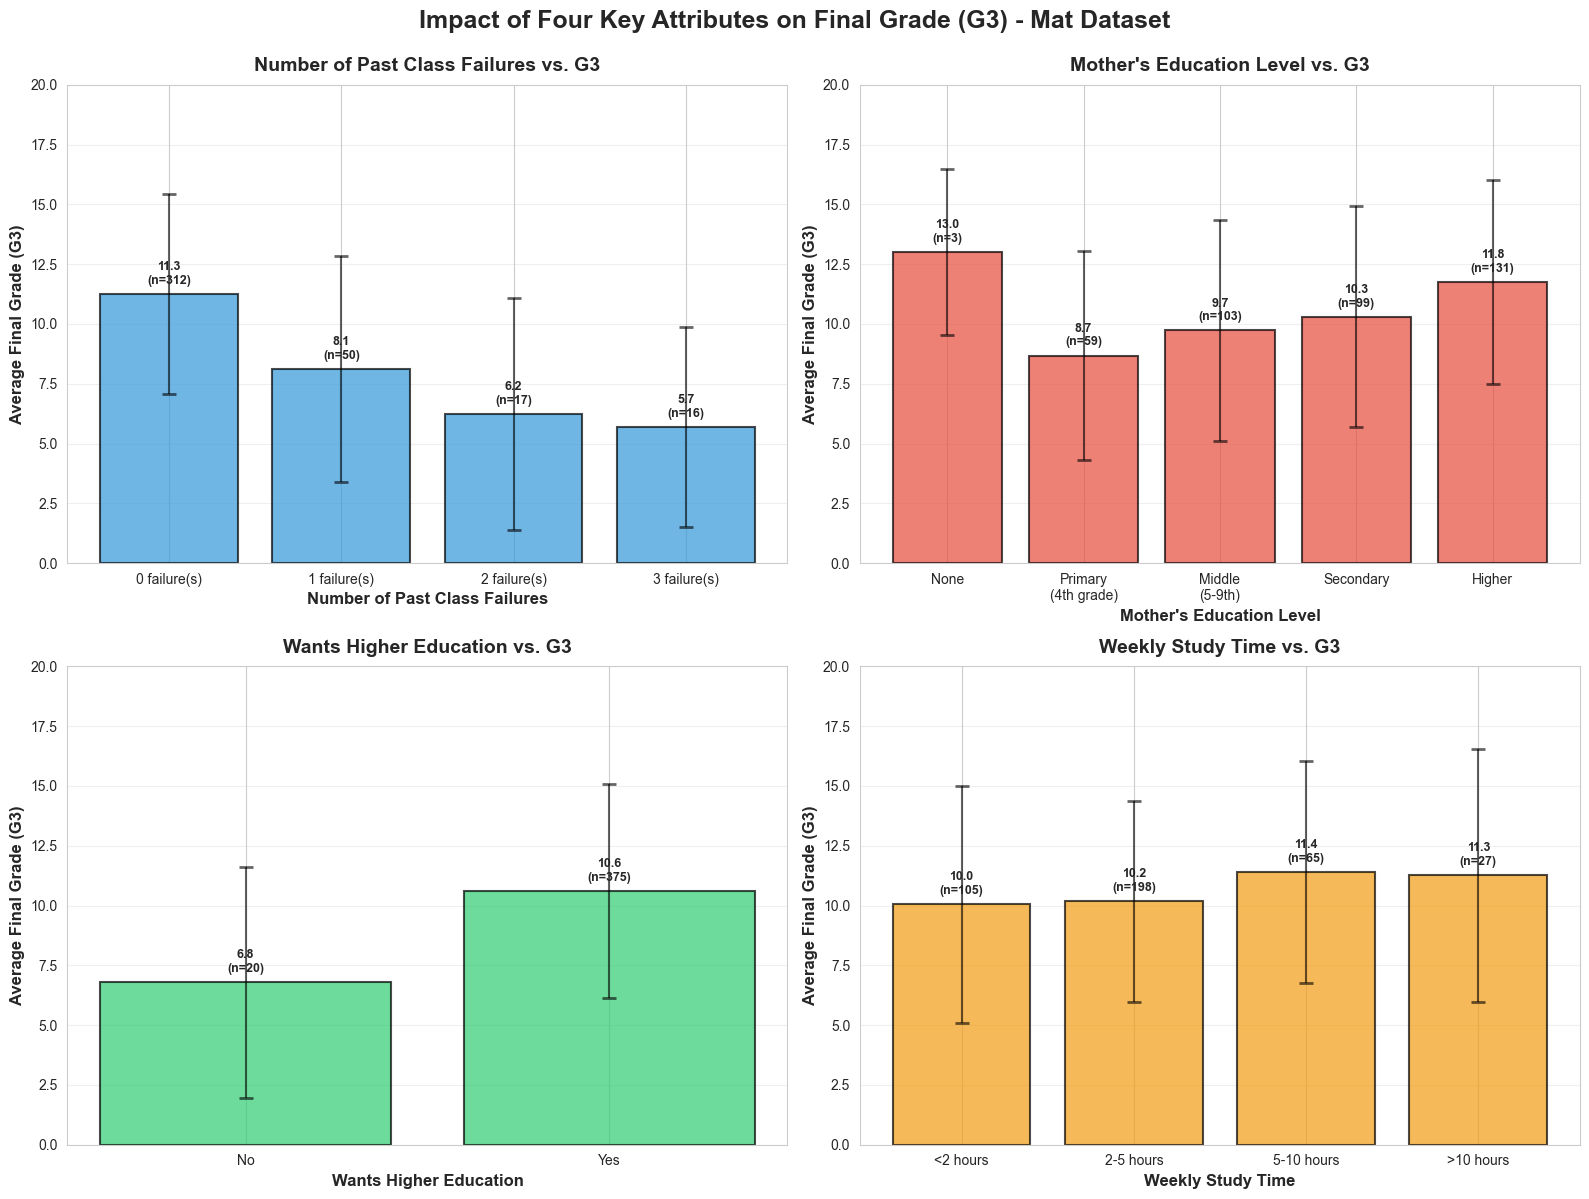


 Por Dataset 



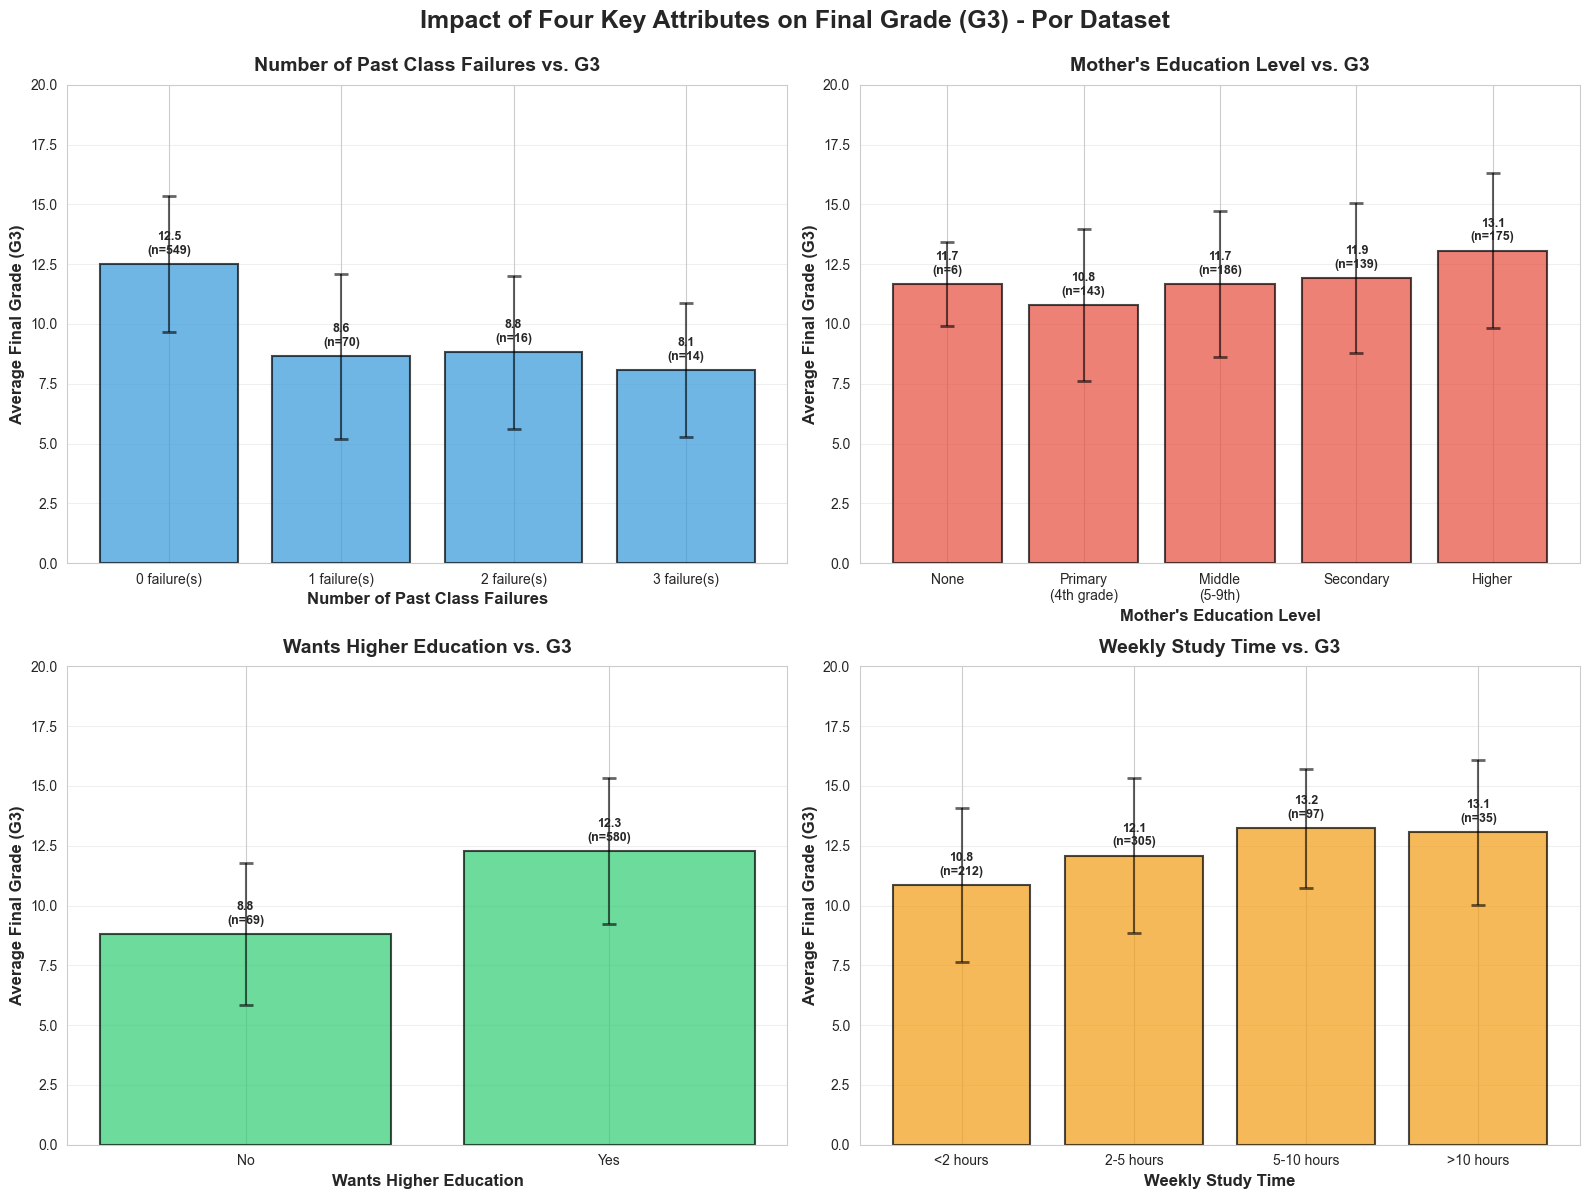

In [108]:
# Create visualizations for both datasets
print("\n Mat Dataset \n")
create_statistical_visualizations(student_mat_df, "Mat Dataset")

print("\n Por Dataset \n")
create_statistical_visualizations(student_por_df, "Por Dataset")


### **Purpose of the Figure**

The purpose of this figure is to **visualize the impact of four key student attributes on their final grades (G3)** within a single dataset. The attributes analyzed are:

- `failures`: Number of past class failures  
- `Medu`: Mother's education level  
- `higher`: Whether the student wants higher education  
- `studytime`: Weekly study time  

By displaying **average final grades with error bars** representing standard deviation, the visualization highlights patterns and variations associated with these attributes.


### **Big Takeaway**

From this analysis, we can observe several insights:

1. **Past academic performance matters**: Students with more past failures tend to have lower average final grades.
2. **Parental education correlates with student success**: Higher mother’s education (`Medu`) is generally associated with higher final grades.
3. **Ambition impacts performance**: Students who want higher education (`higher`) tend to achieve slightly better grades.
4. **Study habits influence outcomes**: More study time generally leads to higher grades, though the effect may plateau at higher study durations.
5. **Visual clarity with statistics**: Error bars and sample size annotations `(n=...)` indicate variability and reliability of the averages.

Overall, this figure provides a **concise summary of how critical student attributes relate to academic achievement**, enabling educators and analysts to identify key focus areas for intervention or support.

## 4. Trend Analysis: Line Plots Comparing Math and Portuguese Performance


In [ ]:
# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")

def create_line_plots_comparison(df_mat, df_por):
    # Define attributes
    attributes = {
        'failures': {'title': 'Number of Past Class Failures', 'xlabel': 'Number of Failures', 'labels': None},
        'studytime': {'title': 'Weekly Study Time', 'xlabel': 'Study Time Category', 
                     'labels': ['<2 hrs', '2-5 hrs', '5-10 hrs', '>10 hrs']},
        'Medu': {'title': "Mother's Education Level", 'xlabel': 'Education Level',
                'labels': ['None', 'Primary\n(4th)', 'Middle\n(5-9th)', 'Secondary', 'Higher']},
        'goout': {'title': 'Going Out with Friends', 'xlabel': 'Frequency (1=very low, 5=very high)', 'labels': None}
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Comparative Trend Analysis: Mathematics vs Portuguese Performance', 
                 fontsize=18, fontweight='bold', y=0.995)
    
    axes = axes.flatten()
    
    for idx, (attr, info) in enumerate(attributes.items()):
        ax = axes[idx]
        
        # Calculate statistics
        math_stats = df_mat.groupby(attr)['G3'].agg(['mean', 'std', 'count', 'sem'])
        por_stats = df_por.groupby(attr)['G3'].agg(['mean', 'std', 'count', 'sem'])
        
        x_math = math_stats.index.values
        x_por = por_stats.index.values
        
        # Plot lines
        ax.plot(x_math, math_stats['mean'], marker='o', markersize=10, linewidth=3, 
               label='Mathematics', color='#3498db', alpha=0.8)
        ax.plot(x_por, por_stats['mean'], marker='s', markersize=10, linewidth=3, 
               label='Portuguese', color='#e74c3c', alpha=0.8)
        
        # Add confidence intervals
        ax.fill_between(x_math, math_stats['mean'] - math_stats['sem'], 
                        math_stats['mean'] + math_stats['sem'], alpha=0.2, color='#3498db')
        ax.fill_between(x_por, por_stats['mean'] - por_stats['sem'], 
                        por_stats['mean'] + por_stats['sem'], alpha=0.2, color='#e74c3c')
        
        # Customize
        ax.set_xlabel(info['xlabel'], fontsize=12, fontweight='bold')
        ax.set_ylabel('Average Final Grade (G3)', fontsize=12, fontweight='bold')
        ax.set_title(info['title'], fontsize=14, fontweight='bold', pad=10)
        
        if info['labels']:
            ax.set_xticks(range(len(info['labels'])))
            ax.set_xticklabels(info['labels'])
        
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_ylim(0, 20)
        ax.legend(loc='best', fontsize=10, framealpha=0.9)
        
        # Add sample sizes
        for x, mean, count in zip(x_math, math_stats['mean'], math_stats['count']):
            ax.annotate(f'n={count}', xy=(x, mean), xytext=(0, 10), 
                       textcoords='offset points', ha='center', fontsize=8, 
                       color='#3498db', fontweight='bold', alpha=0.7)
        
        for x, mean, count in zip(x_por, por_stats['mean'], por_stats['count']):
            ax.annotate(f'n={count}', xy=(x, mean), xytext=(0, -15), 
                       textcoords='offset points', ha='center', fontsize=8, 
                       color='#e74c3c', fontweight='bold', alpha=0.7)
    
    plt.tight_layout()
    plt.show()



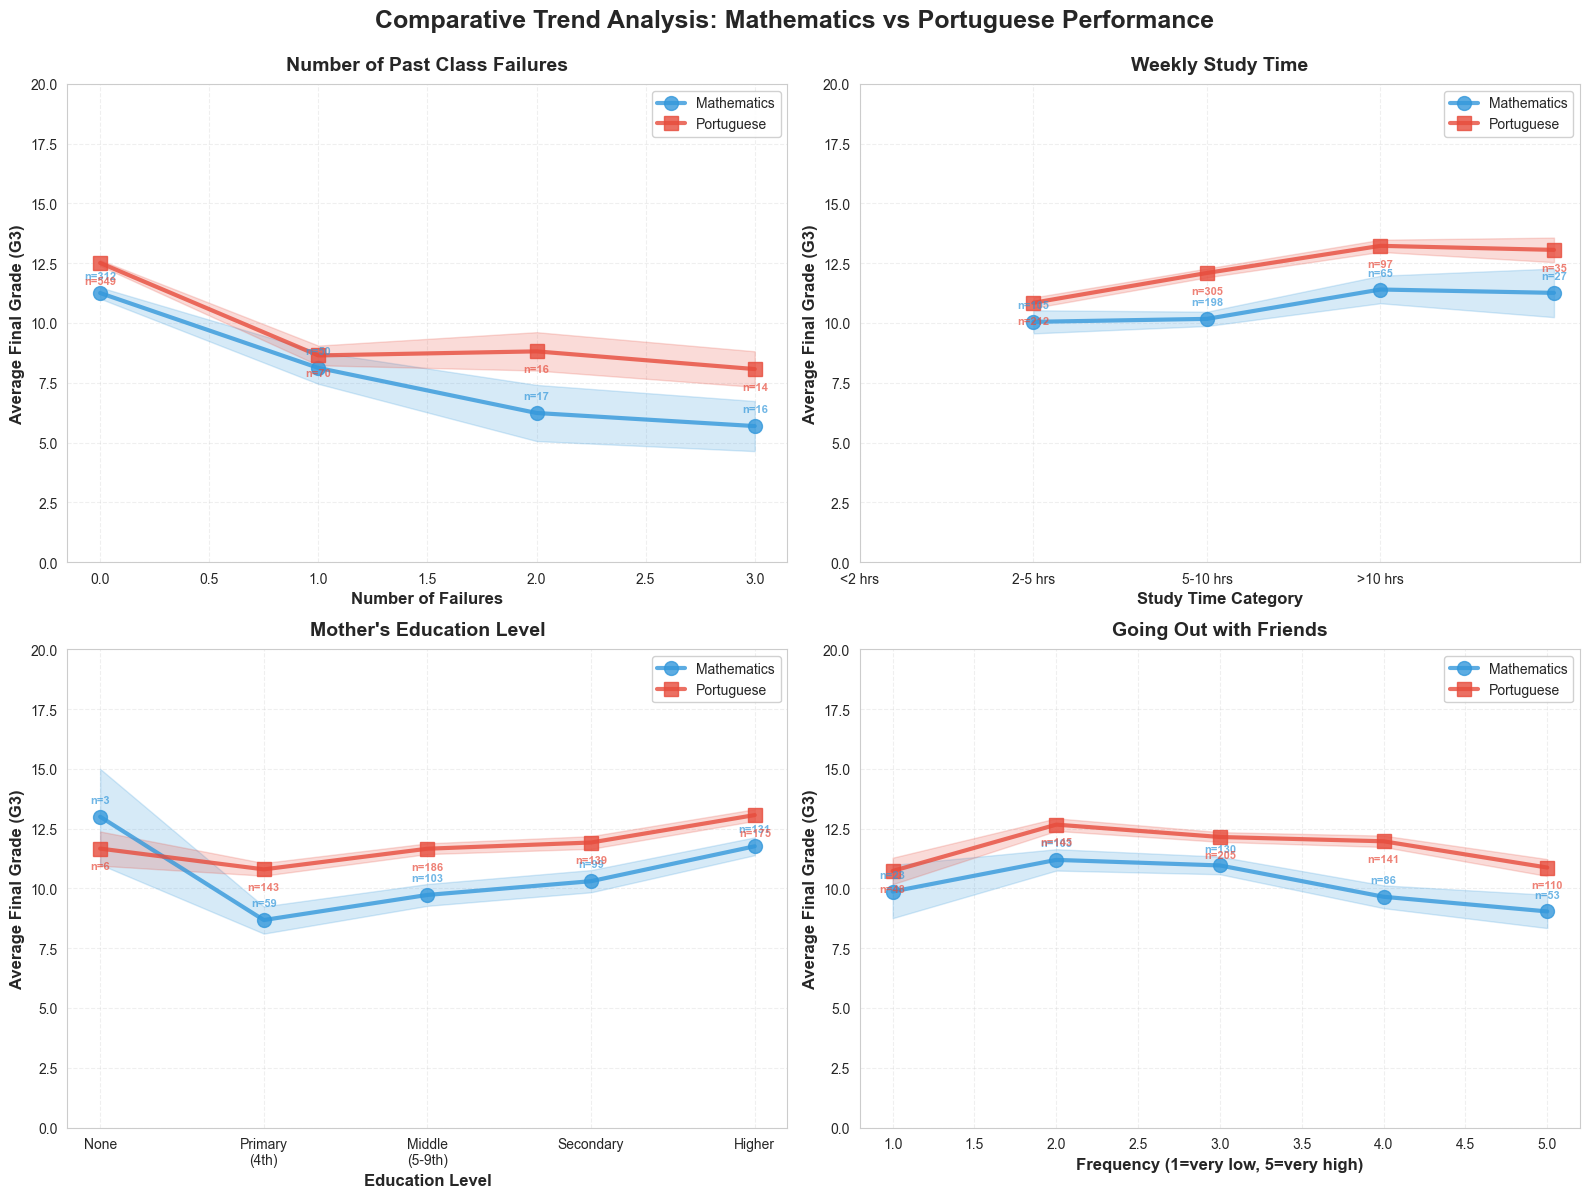

In [114]:
create_line_plots_comparison(student_mat_df, student_por_df)

### **Purpose of the Figure**

The purpose of this figure is to **compare trends in student performance** between Mathematics and Portuguese classes across several key attributes, such as:

- Number of past class failures (`failures`)
- Weekly study time (`studytime`)
- Mother's education level (`Medu`)
- Frequency of going out with friends (`goout`)

By visualizing the **average final grades (G3)** for each attribute, along with **confidence intervals** and **sample sizes**, we can identify patterns and differences between the two subjects.


### **Big Takeaway**

From this comparative analysis, we can observe:

1. **Study habits and parental education matter**: Students with higher study time or more educated mothers tend to achieve higher grades in both subjects.
2. **Social activity influences performance**: Going out more frequently (`goout`) is generally associated with slightly lower average grades.
3. **Subject-specific trends**: Some attributes may affect Mathematics and Portuguese differently. For instance, past failures might have a stronger negative impact on one subject than the other.
4. **Confidence and sample size awareness**: The shaded confidence intervals and `n` annotations show the reliability of the trends and how many students are represented for each category.

Overall, this figure provides a **clear visual summary of how key student characteristics relate to their academic performance** in different subjects, helping educators and analysts identify focus areas for improvement.

# Data Mining Tasks

## Decision Tree for student-mat.csv: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def extract_decision_rules(df, dataset_name):
    # Define target variable - Grade Classification
    # Create performance categories based on G3 (final grade)
    def categorize_grade(grade):
        if grade >= 15:
            return 'High'  # Excellent performance
        elif grade >= 10:
            return 'Medium'  # Satisfactory (passing)
        else:
            return 'Low'  # At risk (failing)
    
    df = df.copy()
    df['Performance'] = df['G3'].apply(categorize_grade)
    
    # Select key features based on correlation analysis
    selected_features = ['failures', 'Medu', 'studytime', 'goout', 'absences', 'higher']
    
    # Prepare feature matrix and target
    X = df[selected_features].copy()
    y = df['Performance']
    
    # Convert 'higher' (yes/no) to numeric
    X['higher'] = (X['higher'] == 'yes').astype(int)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Build Decision Tree with max_depth=4
    dt_classifier = DecisionTreeClassifier(
        max_depth=4,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42,
        criterion='gini'
    )
    
    dt_classifier.fit(X_train, y_train)
    
    # Visualize the Decision Tree
    plt.figure(figsize=(22, 14))
    plot_tree(dt_classifier, 
              feature_names=selected_features,
              class_names=['High', 'Low', 'Medium'],
              filled=True,
              rounded=True,
              fontsize=10,
              proportion=True)
    plt.title(f'Decision Tree for Student Performance Classification - {dataset_name}\n(Max Depth = 4)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': dt_classifier.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    
    return dt_classifier, feature_importance

Mat Dataset 



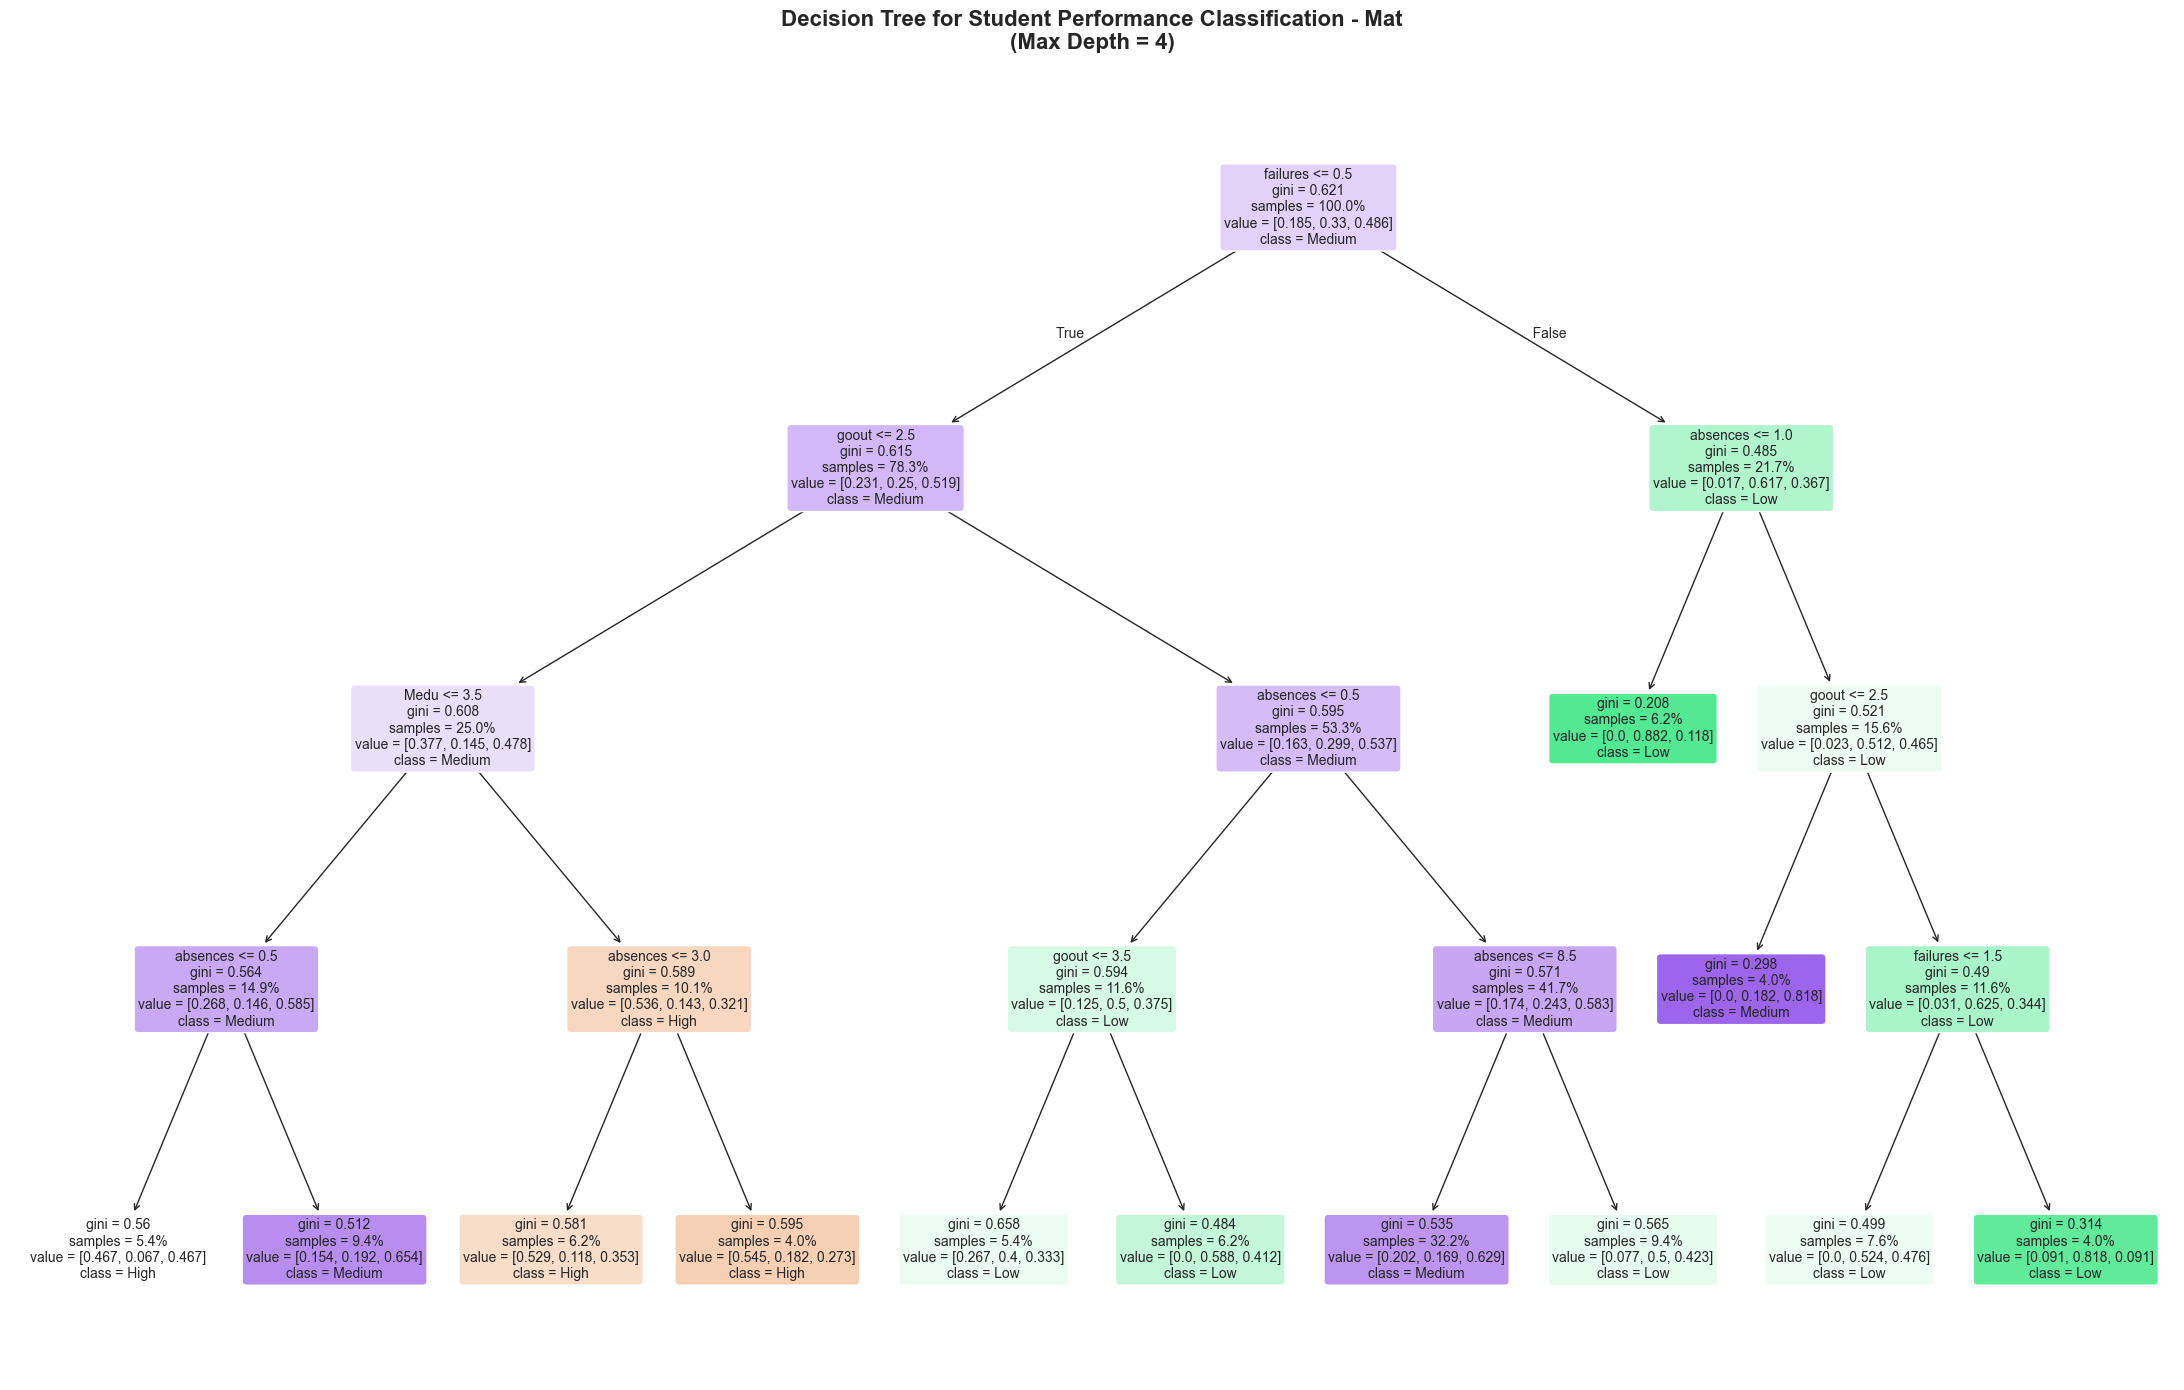

Por Dataset 



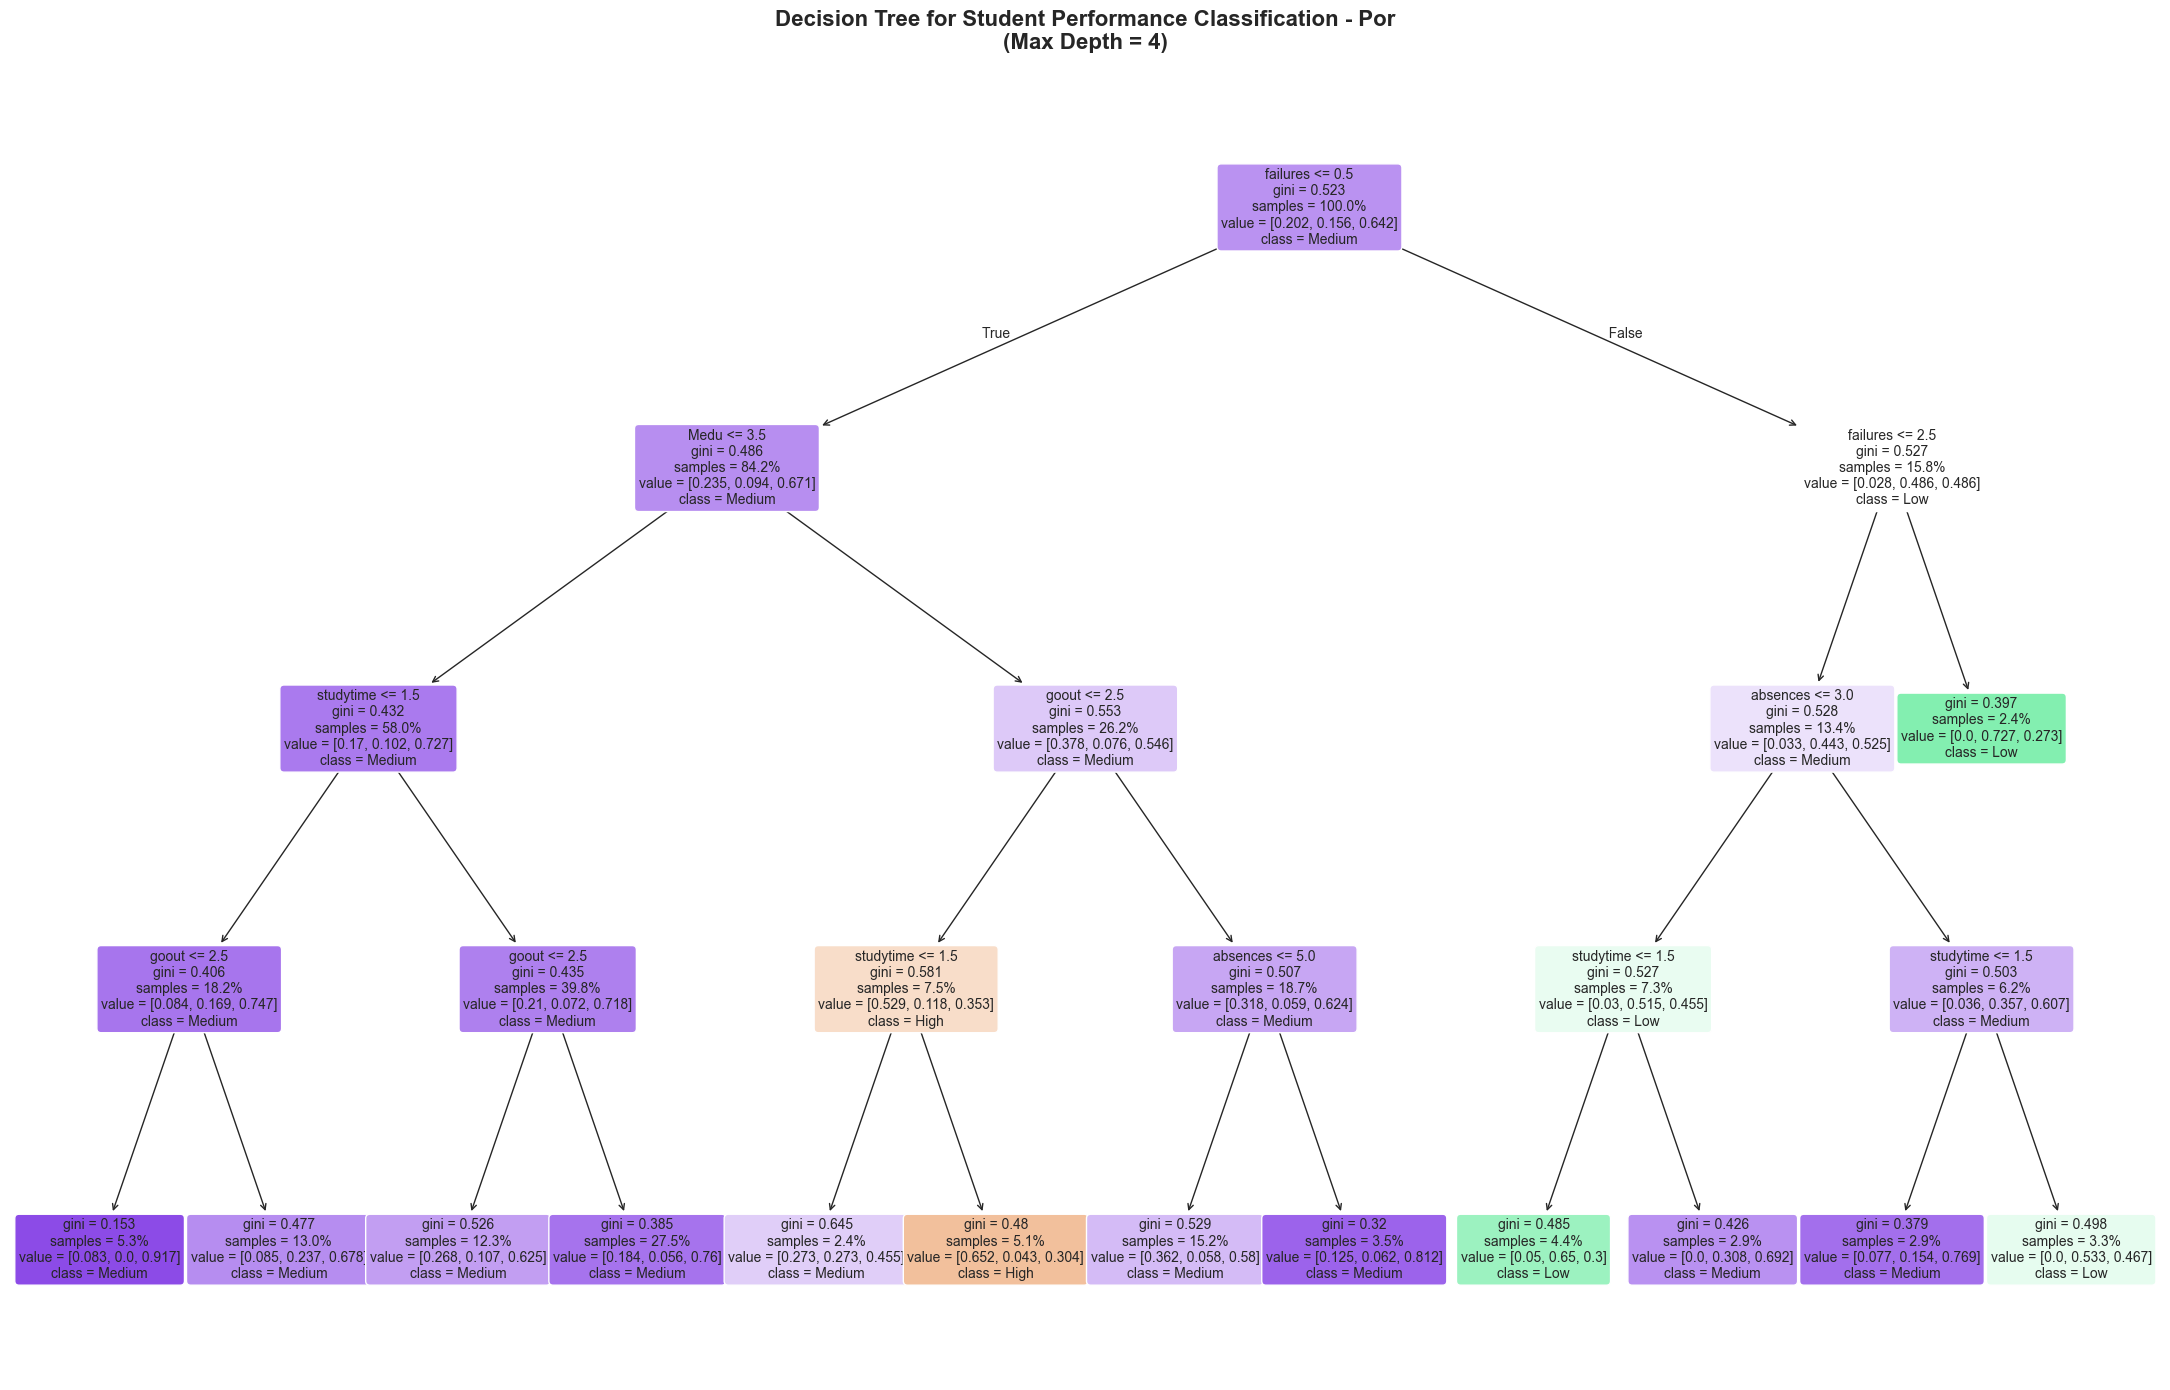

In [139]:
print("Mat Dataset \n")
dt_math, fi_math = extract_decision_rules(student_mat_df, "Mat")

print("Por Dataset \n")
dt_por, fi_por = extract_decision_rules(student_por_df, "Por")

### **Purpose of the Figure**

The purpose of this figure is to **visualize decision rules extracted from the student dataset** using a decision tree model. The tree classifies students' final grades (`G3`) into three categories: **High**, **Medium**, and **Low** performance. By setting the maximum depth to 4, the figure highlights the most important features while keeping the tree **interpretable**.

- **Features considered**: `failures`, `Medu`, `studytime`, `goout`, `absences`, `higher`
- **Target**: `Performance` category (High / Medium / Low)
- **Decision Tree Visualization**: Each node shows a decision condition, class distribution, and predicted performance category, providing clear rules for classification.


### **Big Takeaway**

1. **Key factors influencing student performance**: The tree identifies important predictors like past failures, study time, and parental education (Medu).  
2. **Rule extraction**: Each path from the root to a leaf represents an interpretable rule (e.g., *“If failures > 1 and studytime < 2, then Performance is likely Low”*).  
3. **Practical insights for intervention**: Educators can use these rules to detect students at risk and provide targeted support or resources.  
4. **Balanced complexity and interpretability**: Limiting the tree depth ensures the decision rules are easy to understand while capturing meaningful patterns in the data.  
